In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load the Dataset
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Explore the Dataset
df.info()
print("\nMissing values:\n", df.isnull().sum())
print("\nClass distribution:\n", df['species'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Class distribution:
 species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


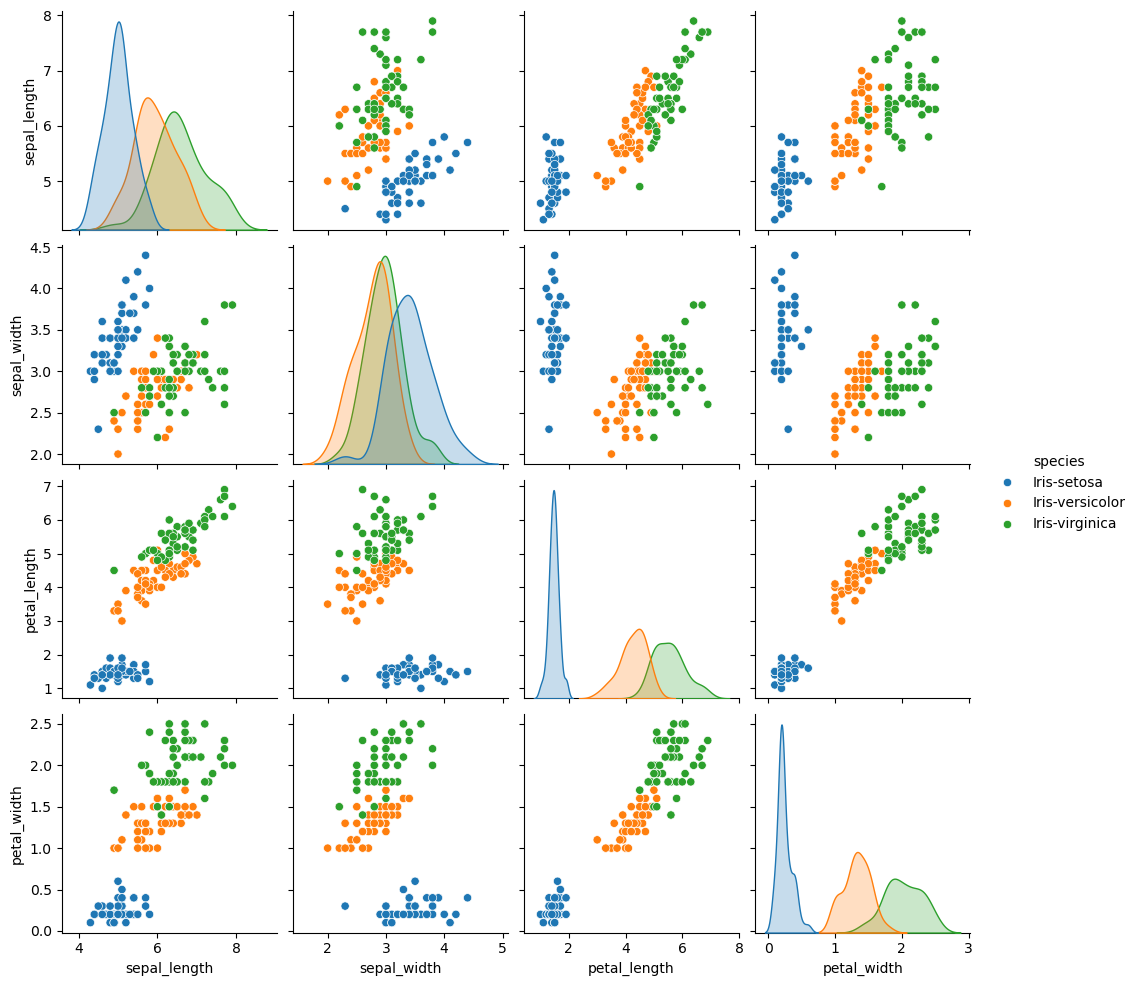

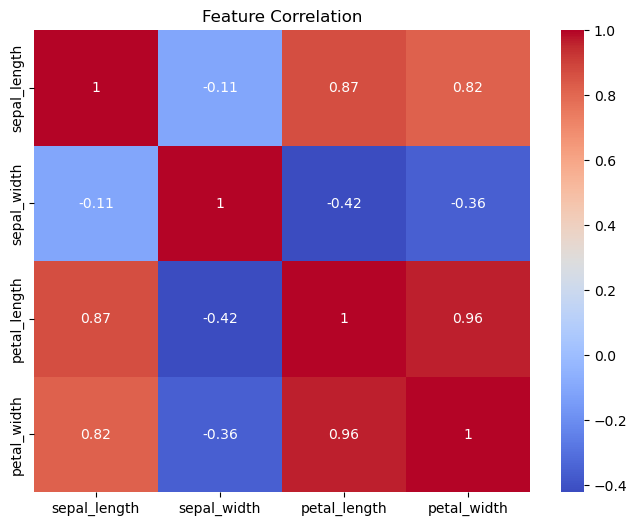

In [4]:
# Visualize the Data
sns.pairplot(df, hue='species')
plt.show()

# Drop non-numeric column for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [5]:
# Preprocess the Data
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])  # 0,1,2 for species

# Separate features and target
X = df.drop('species', axis=1)
y = df['species']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
# Train Models
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

In [7]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

In [8]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

In [9]:
# Evaluate the Models
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, log_preds))
print(confusion_matrix(y_test, log_preds))
print(classification_report(y_test, log_preds))

Logistic Regression:
Accuracy: 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [10]:
print("K-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, knn_preds))
print(confusion_matrix(y_test, knn_preds))
print(classification_report(y_test, knn_preds))

K-Nearest Neighbors:
Accuracy: 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [11]:
print("Support Vector Machine:")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print(confusion_matrix(y_test, svm_preds))
print(classification_report(y_test, svm_preds))

Support Vector Machine:
Accuracy: 0.9666666666666667
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [12]:
# Generate Classification Reports
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression
log_report = classification_report(y_test, log_preds, output_dict=True)
log_acc = accuracy_score(y_test, log_preds)

# KNN
knn_report = classification_report(y_test, knn_preds, output_dict=True)
knn_acc = accuracy_score(y_test, knn_preds)

# SVM
svm_report = classification_report(y_test, svm_preds, output_dict=True)
svm_acc = accuracy_score(y_test, svm_preds)

In [13]:
# Summarize the Results in a Table
# Summary table
summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM'],
    'Accuracy': [log_acc, knn_acc, svm_acc],
    'Precision (avg)': [
        log_report['weighted avg']['precision'],
        knn_report['weighted avg']['precision'],
        svm_report['weighted avg']['precision']
    ],
    'Recall (avg)': [
        log_report['weighted avg']['recall'],
        knn_report['weighted avg']['recall'],
        svm_report['weighted avg']['recall']
    ],
    'F1-Score (avg)': [
        log_report['weighted avg']['f1-score'],
        knn_report['weighted avg']['f1-score'],
        svm_report['weighted avg']['f1-score']
    ]
})

# Display
print(summary.round(3))

                 Model  Accuracy  Precision (avg)  Recall (avg)  \
0  Logistic Regression     1.000            1.000         1.000   
1                  KNN     1.000            1.000         1.000   
2                  SVM     0.967            0.969         0.967   

   F1-Score (avg)  
0           1.000  
1           1.000  
2           0.966  


In [14]:
# Model Saving & Loading
import joblib

# Save the model
joblib.dump(svm_model, 'svm_iris_model.joblib')

# Load it back later
loaded_model = joblib.load('svm_iris_model.joblib')

# Predict using loaded model
sample_pred = loaded_model.predict([X_test[0]])
print("Predicted class:", sample_pred)

Predicted class: [1]


In [15]:
# Cross-Validation (with accuracy)
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation
cv_scores = cross_val_score(svm_model, X_scaled, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Average accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.93333333 1.        ]
Average accuracy: 0.9666666666666668


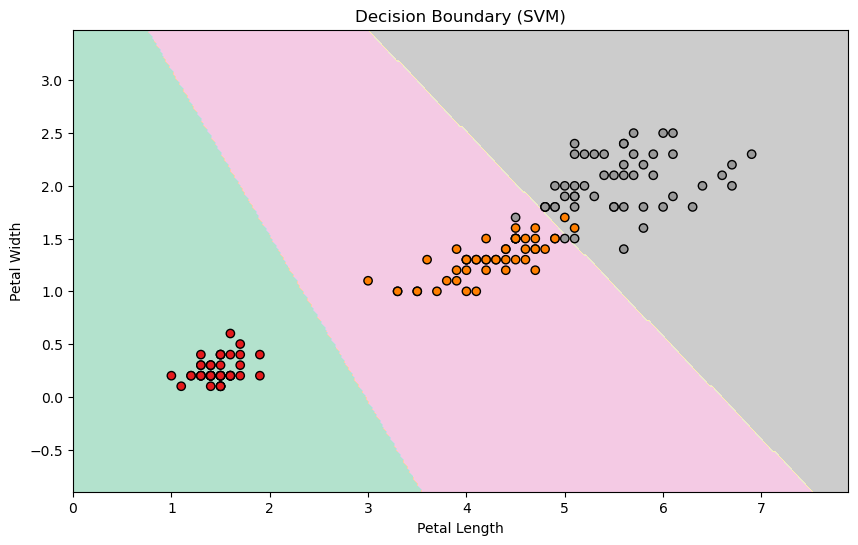

In [16]:
# Plot Decision Boundaries (only for 2 features)
# Use only 2 features for visualization
X_vis = df[['petal_length', 'petal_width']].values
y_vis = le.fit_transform(df['species'])

# Train SVM again for 2D plot
svm_2d = SVC(kernel='linear')
svm_2d.fit(X_vis, y_vis)

# Create a mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on mesh grid
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap='Pastel2')
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap='Set1', edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Decision Boundary (SVM)')
plt.show()

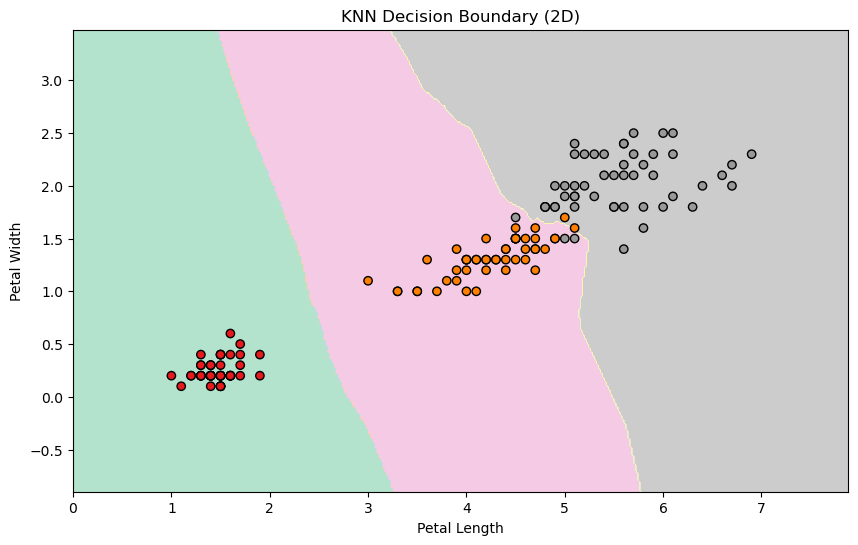

In [17]:
# KNN Decision Boundary (2 features) --Option 1
from sklearn.neighbors import KNeighborsClassifier

# Only use 2 features for visualization
X_2d = df[['petal_length', 'petal_width']].values
y_2d = le.fit_transform(df['species'])

# Fit KNN on 2D
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_2d, y_2d)

# Meshgrid
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict and plot
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap='Pastel2')
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap='Set1', edgecolor='k')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("KNN Decision Boundary (2D)")
plt.show()

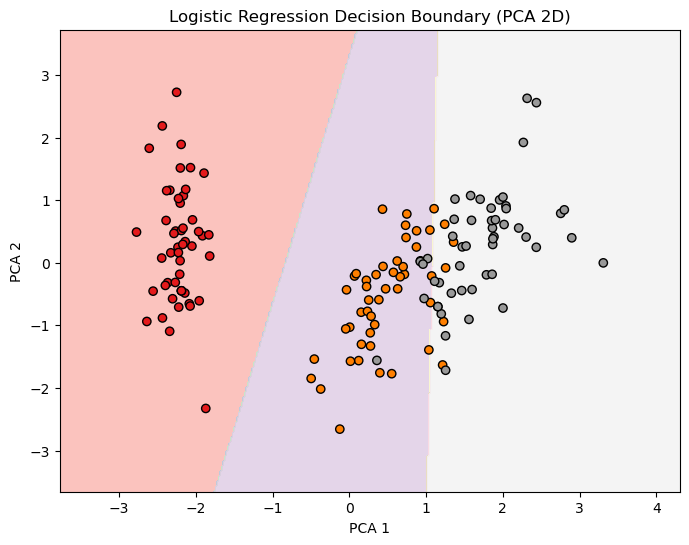

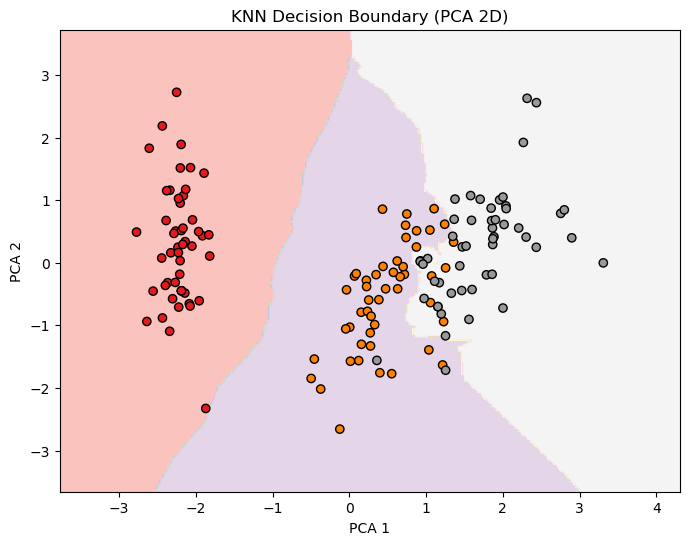

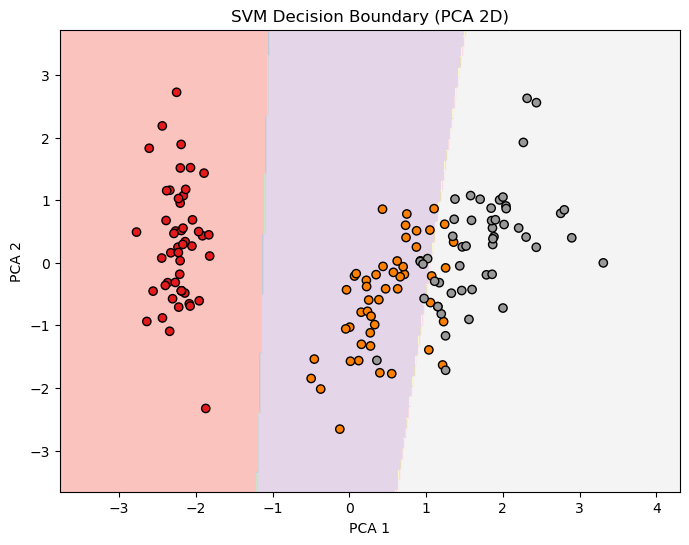

In [18]:
# PCA + Decision Boundaries (All Models) --Option 2
from sklearn.decomposition import PCA

# Reduce all 4 features to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Re-train classifiers on PCA-transformed data
log_pca = LogisticRegression().fit(X_pca, y)
knn_pca = KNeighborsClassifier(n_neighbors=5).fit(X_pca, y)
svm_pca = SVC(kernel='linear').fit(X_pca, y)

models = {'Logistic Regression': log_pca, 'KNN': knn_pca, 'SVM': svm_pca}
colors = ['Reds', 'Blues', 'Greens']

# Plot all 3 decision boundaries
for i, (name, model) in enumerate(models.items()):
    plt.figure(figsize=(8, 6))

    # Create mesh
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Predict
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap='Pastel1', alpha=0.8)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Set1', edgecolor='k')
    plt.title(f"{name} Decision Boundary (PCA 2D)")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.show()